In [16]:
import pandas as pd
import requests as req
import my_utils as mu
from tqdm import tqdm
from PIL import Image
from io import BytesIO
from oracle_test import OracleTools

In [66]:
sample = mu.getSampleData('gold',2,1,'RGAPI-cc72c431-c96f-460b-9335-711b83f62414')

get SummonerName.....


100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


total player:  1
get puuid......


100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


passed player:  0
get match_id...


100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


get matches & timeline.....


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

complete!


In [69]:
sample = sample.iloc[0]

In [76]:
print(sample['matches']['info']['participants'][7]['summonerName'])
print(sample['matches']['info']['participants'][7]['puuid'])

가와구치
S9nF17Q5uh8pU53s7rBw19syrFMS_9Bvn1VwFyLi7lyNMm_JDmyv5uThuoC5JuwLXpmsyftkCULKJw


In [77]:
sage_id = mu.getMatchIdsByPuuid('S9nF17Q5uh8pU53s7rBw19syrFMS_9Bvn1VwFyLi7lyNMm_JDmyv5uThuoC5JuwLXpmsyftkCULKJw', 'RGAPI-cc72c431-c96f-460b-9335-711b83f62414')

In [78]:
sage_data = []
for i, v in enumerate(sage_id):
    sage_data.append(mu.getMatchDataByMatchIds([v], 'RGAPI-cc72c431-c96f-460b-9335-711b83f62414', 0))

In [80]:
names = [(ai, bi, b['summonerName']) for ai,a in enumerate(sage_data) for bi, b in enumerate(a['info']['participants'])]

In [83]:
sage_list = list(filter(lambda x: x[2]=='가와구치', names))

In [84]:
sage_list

[(0, 7, '가와구치'),
 (1, 2, '가와구치'),
 (2, 7, '가와구치'),
 (3, 7, '가와구치'),
 (4, 7, '가와구치'),
 (5, 7, '가와구치'),
 (6, 2, '가와구치'),
 (7, 2, '가와구치'),
 (8, 7, '가와구치'),
 (9, 7, '가와구치')]

In [85]:
sage_champ_kills = [(sage_data[a[0]]['info']['participants'][a[1]]['championName'], sage_data[a[0]]['info']['participants'][a[1]]['kills']) for a in sage_list]

In [86]:
sage_perks = [sage_data[a[0]]['info']['participants'][a[1]]['perks'] for a in sage_list]

In [87]:
for a in range(10):
    print(sage_champ_kills[a])
    print(sage_perks[a])

('Yone', 0)
{'statPerks': {'defense': 5002, 'flex': 5008, 'offense': 5005}, 'styles': [{'description': 'primaryStyle', 'selections': [{'perk': 8008, 'var1': 8, 'var2': 1, 'var3': 0}, {'perk': 9111, 'var1': 0, 'var2': 0, 'var3': 0}, {'perk': 9104, 'var1': 0, 'var2': 0, 'var3': 0}, {'perk': 8299, 'var1': 261, 'var2': 0, 'var3': 0}], 'style': 8000}, {'description': 'subStyle', 'selections': [{'perk': 8444, 'var1': 413, 'var2': 0, 'var3': 0}, {'perk': 8242, 'var1': 74, 'var2': 0, 'var3': 0}], 'style': 8400}]}
('Morgana', 4)
{'statPerks': {'defense': 5001, 'flex': 5008, 'offense': 5005}, 'styles': [{'description': 'primaryStyle', 'selections': [{'perk': 8229, 'var1': 3124, 'var2': 0, 'var3': 0}, {'perk': 8226, 'var1': 250, 'var2': 2841, 'var3': 0}, {'perk': 8210, 'var1': 30, 'var2': 0, 'var3': 0}, {'perk': 8237, 'var1': 1303, 'var2': 0, 'var3': 0}], 'style': 8200}, {'description': 'subStyle', 'selections': [{'perk': 8345, 'var1': 3, 'var2': 0, 'var3': 0}, {'perk': 8304, 'var1': 10, 'var2': 

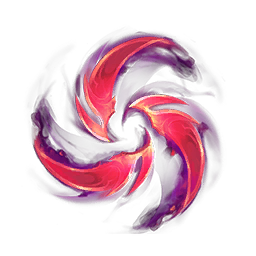

In [17]:
Image.open(BytesIO(req.get(f'http://ddragon.leagueoflegends.com/cdn/img/perk-images/Styles/Domination/HailOfBlades/HailOfBlades.png').content))

In [ ]:
req.get(f'http://ddragon.leagueoflegends.com/cdn/img/perk-images/Styles/Domination/HailOfBlades/HailOfBlades.png')